# California -- City Sustainability

In [1]:
%pip install census us

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from census import Census
from us import states

import plotly.graph_objects as go

In [3]:
c = Census('fb97753783c42ae57fe1a640e38fe04e921e5d1a')

## Get's the 5 largest cities in California

In [4]:
city_2010 = c.sf1.state_place(('NAME', 'H001001', 
                               'P013001', 'P002002', 'P002005', 
                               'P013001', 'H003001', 'P027001', 
                               'H005001', 'H005002', 'H005003', 
                               'H005004', 'H005005', 'H005006', 
                               'H005007', 'P002001'), 
                              states.CA.fips, '*', year=2010)
c_pop_2010 = pd.DataFrame.from_records(city_2010)
c_pop_2010_50000 = c_pop_2010.rename(columns={
        'NAME' : 'City_Name',
        'place': 'FIPS',
        'P002001': 'Total_Population',
        'P002002':'Total_Urban_Population',
        'P002005':'Total_Rural_Population',
        'H001001': 'Total_Housing',
        'P013001': 'Median_Age',
        'H003001': 'Occupancy_Status_For_Housing_Units',
        'P027001': 'Presence_of_Non-Relatives',
        'H005001': 'Vacancy_Status',
        'H005002': 'For_Rent',
        'H005003': 'Rented_Not_Occupied',
        'H005004': 'For_Sale_Only',
        'H005005': 'Sold_Not_Occupied',
        'H005006': 'For_Seasonal_Recreational_Or_Occasional_Use',
        'H005007': 'For_Migrant_Workers'})

In [5]:
c_pop_2010_50000['Year'] = 2010

In [6]:
c_pop_2010_50000 = c_pop_2010_50000.nlargest(5, 'Total_Population')

In [7]:
c_pop_2010_50000.head()

Total_Housing  Occupancy_Status_For_Housing_Units  Vacancy_Status  \
789       1413995.0                           1413995.0         95827.0   
1187       516033.0                            516033.0         32941.0   
1197       314038.0                            314038.0         12672.0   
1191       376942.0                            376942.0         31131.0   
500        171288.0                            171288.0         12939.0   

      For_Rent  Rented_Not_Occupied  For_Sale_Only  Sold_Not_Occupied  \
789    53309.0               2367.0        10930.0             2671.0   
1187   13900.0                952.0         4550.0              873.0   
1197    5572.0                319.0         2891.0              603.0   
1191   12832.0                779.0         2984.0              759.0   
500     6638.0                259.0         2071.0              419.0   

      For_Seasonal_Recreational_Or_Occasional_Use  For_Migrant_Workers  \
789                                        7540.0                 28.0   
1187                                       7737.0                 13.0   
1197                                        845.0                  3.0   
1191                                       5564.0                  5.0   
500                                         449.0                  4.0   

                           City_Name  Total_Population  \
789     Los Angeles city, California         3792621.0   
1187      San Diego city, California         1307402.0   
1197       San Jose city, California          945942.0   
1191  San Francisco city, California          805235.0   
500          Fresno city, California          494665.0   

      Total_Urban_Population  Total_Rural_Population  Median_Age  \
789                3790144.0                  2477.0        34.1   
1187               1306002.0                  1400.0        33.6   
1197                945631.0                   311.0        35.2   
1191                805235.0                     0.0        38.5   
500                 494522.0                   143.0        29.3   

      Presence_of_Non-Relatives   FIPS state  Year  
789                   1318168.0  44000    06  2010  
1187                   483092.0  66000    06  2010  
1197                   301366.0  68000    06  2010  
1191                   345811.0  67000    06  2010  
500                    158349.0  27000    06  2010

In [8]:
city_2000 = c.sf1.state_place(('NAME', 'H001001', 
                               'P013001', 'P002002', 'P002005', 
                               'P013001', 'H003001', 'P027001', 
                               'H005001', 'H005002', 'H005003', 
                               'H005004', 'H005005', 'H005006', 
                               'H005007', 'P002001'), states.CA.fips, '*', year=2000)
c_pop_2000 = pd.DataFrame.from_records(city_2000)
c_pop_2000_50000 = c_pop_2000.rename(columns={
        'NAME' : 'City_Name',
        'place': 'FIPS',
        'P002001': 'Total_Population',
        'P002002':'Total_Urban_Population',
        'P002005':'Total_Rural_Population',
        'H001001': 'Total_Housing',
        'P013001': 'Median_Age',
        'H003001': 'Occupancy_Status_For_Housing_Units',
        'P027001': 'Presence_of_Non-Relatives',
        'H005001': 'Vacancy_Status',
        'H005002': 'For_Rent',
        'H005003': 'Rented_Not_Occupied',
        'H005004': 'For_Sale_Only',
        'H005005': 'Sold_Not_Occupied',
        'H005006': 'For_Seasonal_Recreational_Or_Occasional_Use',
        'H005007': 'For_Migrant_Workers'})

In [9]:
#c_pop_2000_50000.drop(columns=['City_Name', 'state'], inplace=True)
c_pop_2000_50000['Year'] = 2000

In [10]:
list_2010 = c_pop_2010_50000['FIPS'].tolist()

In [11]:
c_pop_2000_50000 = c_pop_2000_50000[c_pop_2000_50000['FIPS'].isin(list_2010)] 

In [12]:
c_pop_2000_50000.head()

Total_Housing Occupancy_Status_For_Housing_Units Vacancy_Status For_Rent  \
79         149025                             149025           8946     4769   
247       1337706                            1337706          62294    28529   
553        469689                             469689          18998     7511   
717        346527                             346527          16827     5594   
719        281841                             281841           5243     1929   

    Rented_Not_Occupied For_Sale_Only Sold_Not_Occupied  \
79                 1385           532               363   
247                9036          5161              4876   
553                1806          1787              5093   
717                 910          1419              3762   
719                 714           578               818   

    For_Seasonal_Recreational_Or_Occasional_Use For_Migrant_Workers  \
79                                            6                1891   
247                                          29               14663   
553                                           7                2794   
717                                          79                5063   
719                                          50                1154   

              City_Name Total_Population Total_Urban_Population  \
79          Fresno city           427652                      0   
247    Los Angeles city          3694820                      0   
553      San Diego city          1223400                      0   
717  San Francisco city           776733                      0   
719       San Jose city           894943                      0   

    Total_Rural_Population Median_Age Presence_of_Non-Relatives   FIPS state  \
79                       0       28.5                    427652  27000    06   
247                      0       31.6                   3694820  44000    06   
553                      0       32.5                   1223400  66000    06   
717                      0       36.5                    776733  67000    06   
719                      0       32.6                    894943  68000    06   

     Year  
79   2000  
247  2000  
553  2000  
717  2000  
719  2000

In [13]:
ca_df = pd.concat([c_pop_2000_50000, c_pop_2010_50000], ignore_index=True)

In [14]:
ca_df.head()

Total_Housing Occupancy_Status_For_Housing_Units Vacancy_Status For_Rent  \
0        149025                             149025           8946     4769   
1       1337706                            1337706          62294    28529   
2        469689                             469689          18998     7511   
3        346527                             346527          16827     5594   
4        281841                             281841           5243     1929   

  Rented_Not_Occupied For_Sale_Only Sold_Not_Occupied  \
0                1385           532               363   
1                9036          5161              4876   
2                1806          1787              5093   
3                 910          1419              3762   
4                 714           578               818   

  For_Seasonal_Recreational_Or_Occasional_Use For_Migrant_Workers  \
0                                           6                1891   
1                                          29               14663   
2                                           7                2794   
3                                          79                5063   
4                                          50                1154   

            City_Name Total_Population Total_Urban_Population  \
0         Fresno city           427652                      0   
1    Los Angeles city          3694820                      0   
2      San Diego city          1223400                      0   
3  San Francisco city           776733                      0   
4       San Jose city           894943                      0   

  Total_Rural_Population Median_Age Presence_of_Non-Relatives   FIPS state  \
0                      0       28.5                    427652  27000    06   
1                      0       31.6                   3694820  44000    06   
2                      0       32.5                   1223400  66000    06   
3                      0       36.5                    776733  67000    06   
4                      0       32.6                    894943  68000    06   

   Year  
0  2000  
1  2000  
2  2000  
3  2000  
4  2000

In [41]:
ca_df["Total_Housing"]=ca_df["Total_Housing"].astype('i8')
ca_df["Total_Population"]=ca_df["Total_Population"].astype('i8')
ca_df["Year"]=ca_df["Year"].astype('i8')
ca_df["FIPS"]=ca_df["FIPS"].astype('i8')

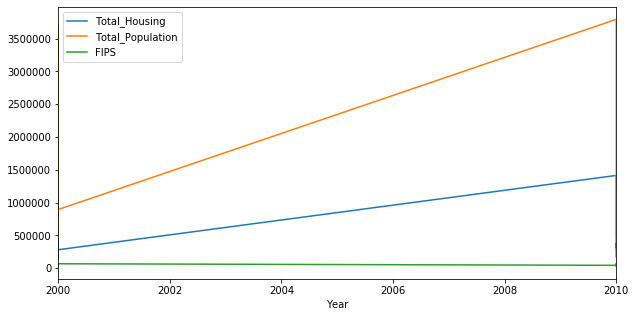

In [42]:
ca_df.set_index('Year').plot(figsize=(10,5))

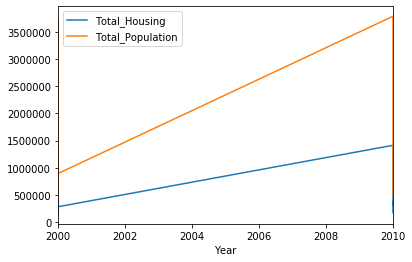

In [43]:
ca_df.plot(x="Year", y=["Total_Housing", "Total_Population"])

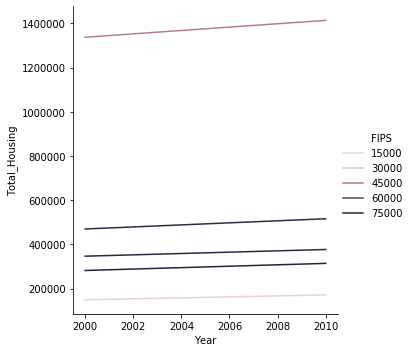

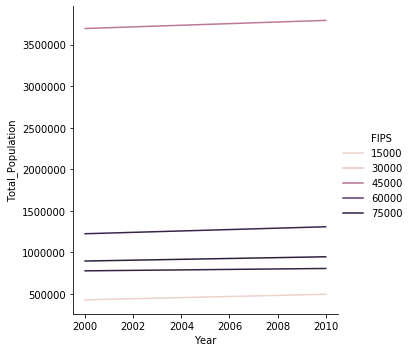

In [45]:
sns.relplot(x="Year", y="Total_Housing", data=ca_df, kind="line", hue="FIPS")
sns.relplot(x="Year", y="Total_Population", data=ca_df, kind="line", hue="FIPS")

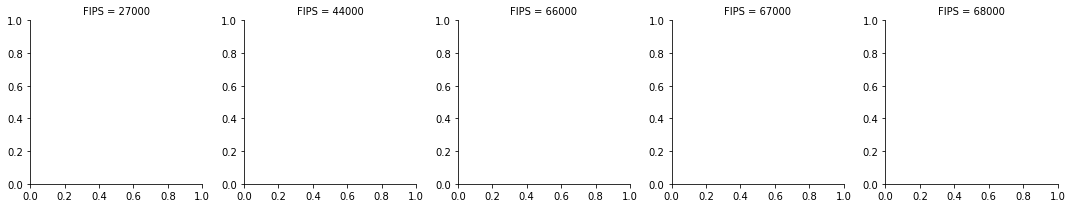

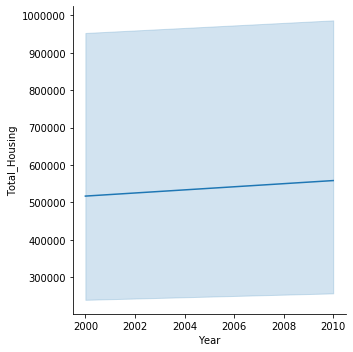

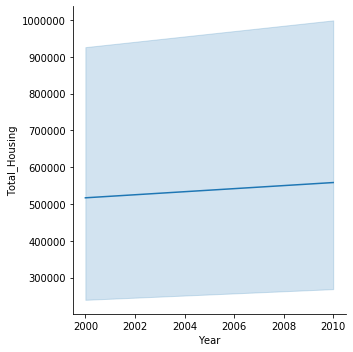

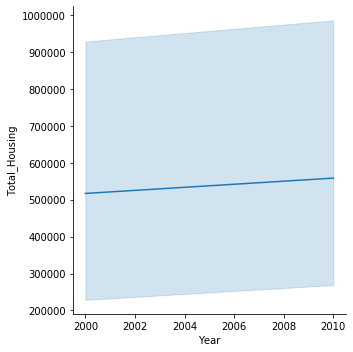

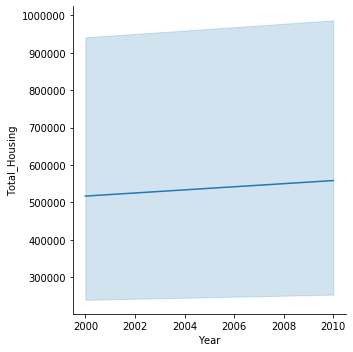

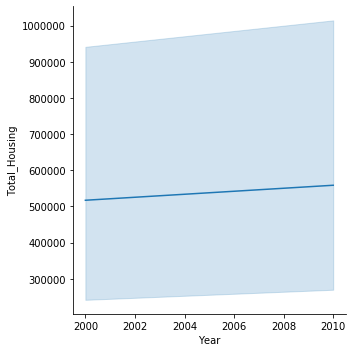

In [35]:
g = sns.FacetGrid(ca_df, col="FIPS", sharey=False, sharex=False)
g = g.map(sns.relplot, x="Year", y="Total_Housing", data=ca_df, kind="line")

In [29]:
data_store=[]
for index, row in ca_df.iterrows():
    if row['Year'] == 2000:
        data_store.append(go.Scatter(name=row['FIPS'], x=ca_df['Year'], y=ca_df['Total_Population']))

In [30]:
fig = go.Figure(data=data_store)
#fig.update_layout()
fig.show()

In [27]:
plot_df = pd.DataFrame({
    'Total_Population': ca_df['Total_Population'],
    'Total_Housing': ca_df['Total_Housing'],
    'Presence_of_Non-Relatives': ca_df['Presence_of_Non-Relatives']},
    index=ca_df['Year'])

In [32]:
plot_df.head()

Total_Population Total_Housing Presence_of_Non-Relatives
Year                                                         
2000            74066         33881                     31957
2000            74066         33881                     31957
2000            74066         33881                     31957
2000            74066         33881                     31957
2000            74066         33881                     31957

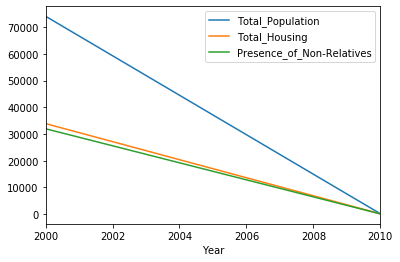

In [30]:
plot_df.plot.line()

In [9]:
c_pop_2000_50000.set_index('FIPS', inplace=True)
c_pop_2010_50000.set_index('FIPS', inplace=True)

In [10]:
ca_join = c_pop_2000_50000.join(c_pop_2010_50000, on='FIPS')

In [11]:
ca_join.head()

Total_Housing_2000 Occupancy_Status_For_Housing_Units_2000  \
FIPS                                                               
02812                915                                     915   
02924               3145                                    3145   
03526              88262                                   88262   
04734               2147                                    2147   
07274               1188                                    1188   

      Vacancy_Status_2000 For_Rent_2000 Rented_Not_Occupied_2000  \
FIPS                                                               
02812                  26            12                        4   
02924                 135            61                       29   
03526                4821          2187                     1018   
04734                 561            15                       69   
07274                 348            18                       46   

      For_Sale_Only_2000 Sold_Not_Occupied_2000  \
FIPS                                              
02812                  1                      1   
02924                  3                     11   
03526                309                    268   
04734                 18                    417   
07274                  6                    219   

      For_Seasonal_Recreational_Or_Occasional_Use_2000  \
FIPS                                                     
02812                                                0   
02924                                                0   
03526                                                3   
04734                                                0   
07274                                                0   

      For_Migrant_Workers_2000 Total_Population_2000  ...  \
FIPS                                                  ...   
02812                        8                  2797  ...   
02924                       31                 12956  ...   
03526                     1036                247057  ...   
04734                       42                  4232  ...   
07274                       59                  1823  ...   

      Sold_Not_Occupied_2010 For_Seasonal_Recreational_Or_Occasional_Use_2010  \
FIPS                                                                            
02812                    6.0                                              7.0   
02924                   12.0                                             15.0   
03526                  387.0                                            427.0   
04734                    9.0                                            385.0   
07274                    2.0                                            187.0   

      For_Migrant_Workers_2010                            City_Name  \
FIPS                                                                  
02812                      0.0               Aromas CDP, California   
02924                      0.0               Arvin city, California   
03526                      7.0         Bakersfield city, California   
04734                      0.0  Bear Valley Springs CDP, California   
07274                      0.0              Bodfish CDP, California   

       Total_Population_2010  Total_Urban_Population_2010  \
FIPS                                                        
02812                 2650.0                          0.0   
02924                19304.0                      19247.0   
03526               347483.0                     345531.0   
04734                 5172.0                          0.0   
07274                 1956.0                        381.0   

       Total_Rural_Population_2010  Median_Age_2010  \
FIPS                                                  
02812                       2650.0             42.2   
02924                         57.0             24.0   
03526                       1952.0             30.0   
04734                       5172.0             51.0   
07274                       1575.0 

In [12]:
ca_join['Total_Population_2000'] = ca_join['Total_Population_2000'].astype('i8')

In [13]:
ca_join = ca_join.nlargest(5, 'Total_Population_2000')

In [31]:
fig = go.Figure(data=[
    go.Line(name='2000_pop', x=ca_join['City_Name'], y=ca_join['Total_Population_2000']),
    go.Line(name='2010_pop', x=ca_join['City_Name'], y=ca_join['Total_Population_2010']),
    go.Line(name='2000_housing', x=ca_join['City_Name'], y=ca_join['Total_Housing_2000']),
    go.Line(name='2010_housing', x=ca_join['City_Name'], y=ca_join['Total_Housing_2010']),
    go.Line(name='2000_non-relatives', x=ca_join['City_Name'], y=ca_join['Presence_of_Non-Relatives_2000']),
    go.Line(name='2010_non-relatives', x=ca_join['City_Name'], y=ca_join['Presence_of_Non-Relatives_2010']),
])
fig.update_layout(barmode='group')
fig.show()

NameError: name 'ca_join' is not defined

## American Community Servey

In [15]:
acs_years = {}
for x in range(2012, 2018):
    acs_test = c.acs5.state_place(('NAME',
'B01003_001E',
'B00002_001E',
'B09018_007E'), states.CA.fips, '*', year=x)
    acs_years[x] = pd.DataFrame.from_records(acs_test)
    print(x)
    acs_years[x] = acs_years[x].rename(columns={
        'NAME' : 'City_Name',
        'place': 'FIPS',
        'B01003_001E': 'Total_Population_{}'.format(x),
        'B00002_001E': 'Total_Housing_{}'.format(x),
        'B09018_007E': 'Presence_of_Non-Relatives_{}'.format(x)})

2012
2013
2014
2015
2016
2017


In [16]:
acs_years[2013].head()

Total_Housing_2013  Total_Population_2013  Presence_of_Non-Relatives_2013  \
0              2840.0                86833.0                           389.0   
1                 5.0                  233.0                             0.0   
2                39.0                 1503.0                             0.0   
3                 7.0                   94.0                             0.0   
4              1506.0                79342.0                           381.0   

                          City_Name   FIPS state  
0            Chico city, California  13014    06  
1   Chilcoot-Vinton CDP, California  13077    06  
2  China Lake Acres CDP, California  13157    06  
3      Chinese Camp CDP, California  13182    06  
4            Chino city, California  13210    06